# CIFAR10 DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers.legacy import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

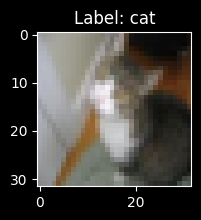

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(32, 32, 3), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Dense(64, activation="relu", name="hidden_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-07 01:12:45.441823: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 01:12:45.441873: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-07 01:12:45.441892: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-07 01:12:45.442433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 01:12:45.442463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.layers

In [12]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               393344    
                                                                 
 dropout_layer_1 (Dropout)   (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 dropout_layer_2 (Dropout)   (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 M

In [13]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
epochs = 10
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [14]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann", monitor="val_accuracy", save_best_only=True
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/cifar10_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 01:12:50.695375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - ETA: 0s - loss: 2.4552 - accuracy: 0.1562

2023-08-07 01:13:04.821242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 18s 39ms/step - loss: 2.4552 - accuracy: 0.1562 - val_loss: 2.0548 - val_accuracy: 0.2516
Epoch 2/10
352/352 [==============================] - ETA: 0s - loss: 2.2006 - accuracy: 0.2142INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 13s 36ms/step - loss: 2.2006 - accuracy: 0.2142 - val_loss: 1.9722 - val_accuracy: 0.2958
Epoch 3/10
352/352 [==============================] - ETA: 0s - loss: 2.0652 - accuracy: 0.2557INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 18s 50ms/step - loss: 2.0652 - accuracy: 0.2557 - val_loss: 1.9320 - val_accuracy: 0.3198
Epoch 4/10
352/352 [==============================] - ETA: 0s - loss: 2.0028 - accuracy: 0.2810INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 17s 47ms/step - loss: 2.0028 - accuracy: 0.2810 - val_loss: 1.9034 - val_accuracy: 0.3336
Epoch 5/10
352/352 [==============================] - ETA: 0s - loss: 1.9607 - accuracy: 0.2985INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 17s 47ms/step - loss: 1.9607 - accuracy: 0.2985 - val_loss: 1.8811 - val_accuracy: 0.3466
Epoch 6/10
352/352 [==============================] - ETA: 0s - loss: 1.9339 - accuracy: 0.3092INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 17s 48ms/step - loss: 1.9339 - accuracy: 0.3092 - val_loss: 1.8667 - val_accuracy: 0.3494
Epoch 7/10
352/352 [==============================] - ETA: 0s - loss: 1.9176 - accuracy: 0.3142INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 18s 52ms/step - loss: 1.9176 - accuracy: 0.3142 - val_loss: 1.8524 - val_accuracy: 0.3500
Epoch 8/10
352/352 [==============================] - ETA: 0s - loss: 1.9050 - accuracy: 0.3233INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 19s 55ms/step - loss: 1.9050 - accuracy: 0.3233 - val_loss: 1.8477 - val_accuracy: 0.3554
Epoch 9/10
352/352 [==============================] - ETA: 0s - loss: 1.8954 - accuracy: 0.3263INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 15s 43ms/step - loss: 1.8954 - accuracy: 0.3263 - val_loss: 1.8383 - val_accuracy: 0.3618
Epoch 10/10
352/352 [==============================] - ETA: 0s - loss: 1.8918 - accuracy: 0.3298INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


352/352 [==============================] - 19s 53ms/step - loss: 1.8918 - accuracy: 0.3298 - val_loss: 1.8298 - val_accuracy: 0.3648


In [15]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 2.0228339195251466
Validation loss: 1.8978377819061278
0.280836 Training accuracy with a standard deviation of 0.053941
0.332880 Validation accuracy with a standard deviation of 0.033570


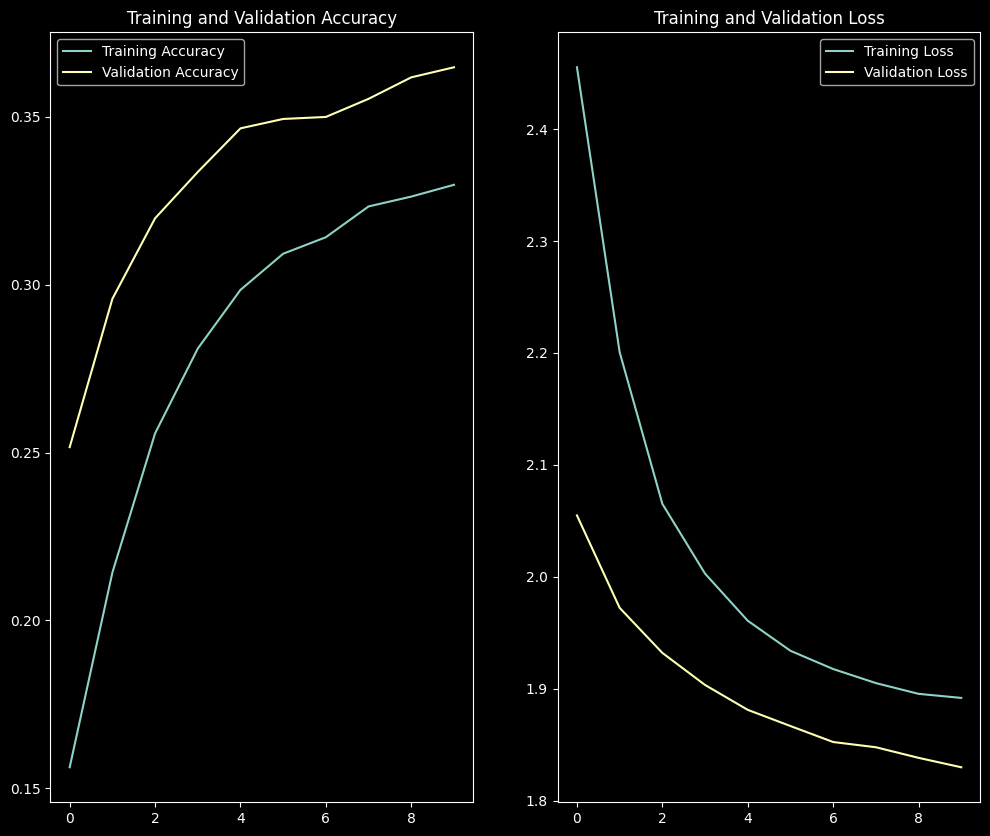

In [16]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [17]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 12s 33ms/step - loss: 1.8131 - accuracy: 0.3709
Test loss: 1.8131238222122192
Test accuracy: 0.3709000051021576


In [18]:
y_pred = ann.predict(X_test)

 21/313 [=>............................] - ETA: 2s

2023-08-07 01:16:04.257551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


In [19]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(32, 32, 3),
            name="conv_layer_1",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv_layer_2",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [20]:
cnn.layers

In [21]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_layer_1 (Dropout)   (None, 16, 16, 64)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 dropout_layer_2 (Dropout)   (None, 8, 8, 128)         0       

In [22]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [23]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/cifar10_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 01:16:51.101756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - ETA: 0s - loss: 2.1956 - accuracy: 0.1823

2023-08-07 01:17:31.635032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 50s 113ms/step - loss: 2.1956 - accuracy: 0.1823 - val_loss: 2.0316 - val_accuracy: 0.2848
Epoch 2/10
352/352 [==============================] - ETA: 0s - loss: 1.9749 - accuracy: 0.2944INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 29s 81ms/step - loss: 1.9749 - accuracy: 0.2944 - val_loss: 1.9373 - val_accuracy: 0.3282
Epoch 3/10
352/352 [==============================] - ETA: 0s - loss: 1.8830 - accuracy: 0.3393INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 41s 115ms/step - loss: 1.8830 - accuracy: 0.3393 - val_loss: 1.8629 - val_accuracy: 0.3502
Epoch 4/10
352/352 [==============================] - ETA: 0s - loss: 1.8030 - accuracy: 0.3700INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 36s 103ms/step - loss: 1.8030 - accuracy: 0.3700 - val_loss: 1.7691 - val_accuracy: 0.3768
Epoch 5/10
352/352 [==============================] - ETA: 0s - loss: 1.7271 - accuracy: 0.3967INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 50s 140ms/step - loss: 1.7271 - accuracy: 0.3967 - val_loss: 1.6939 - val_accuracy: 0.4038
Epoch 6/10
352/352 [==============================] - ETA: 0s - loss: 1.6622 - accuracy: 0.4138INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 56s 158ms/step - loss: 1.6622 - accuracy: 0.4138 - val_loss: 1.6086 - val_accuracy: 0.4322
Epoch 7/10
352/352 [==============================] - ETA: 0s - loss: 1.6081 - accuracy: 0.4295INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 52s 145ms/step - loss: 1.6081 - accuracy: 0.4295 - val_loss: 1.5771 - val_accuracy: 0.4380
Epoch 8/10
352/352 [==============================] - ETA: 0s - loss: 1.5675 - accuracy: 0.4467INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 57s 163ms/step - loss: 1.5675 - accuracy: 0.4467 - val_loss: 1.5261 - val_accuracy: 0.4554
Epoch 9/10
352/352 [==============================] - 50s 141ms/step - loss: 1.5502 - accuracy: 0.4495 - val_loss: 1.5659 - val_accuracy: 0.4288
Epoch 10/10
352/352 [==============================] - ETA: 0s - loss: 1.5506 - accuracy: 0.4488INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


352/352 [==============================] - 59s 166ms/step - loss: 1.5506 - accuracy: 0.4488 - val_loss: 1.4884 - val_accuracy: 0.4718


In [24]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 1.7522151589393615
Validation loss: 1.7060914397239686
0.377120 Training accuracy with a standard deviation of 0.081219
0.397000 Validation accuracy with a standard deviation of 0.057362


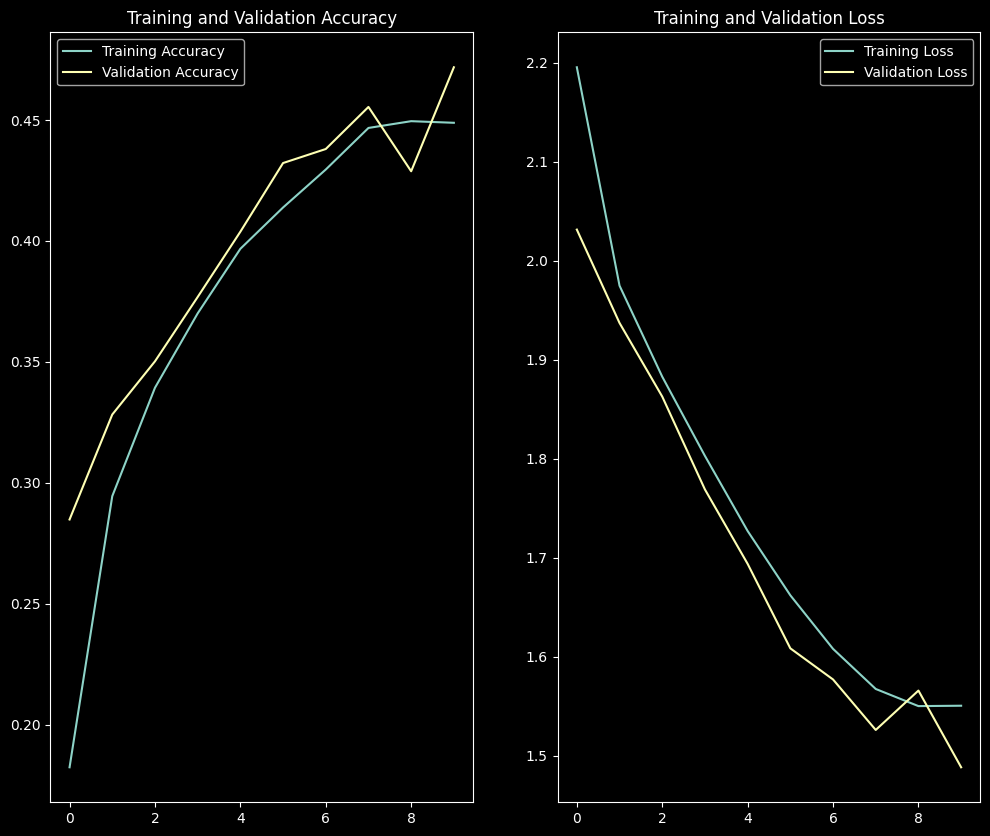

In [25]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [26]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 17s 52ms/step - loss: 1.4880 - accuracy: 0.4623
Test loss: 1.4880188703536987
Test accuracy: 0.46230000257492065


In [27]:
y_pred = cnn.predict(X_test)

  1/313 [..............................] - ETA: 3:04

2023-08-07 01:25:14.486804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 8s 25ms/step
